### Model building
В данной работе предлагается решить задачу мультиклассовойклассификации для датасета флагов различных стран (https://archive.ics.uci.edu/ml/datasets/Flags)

1. Получить данные и загрузить их в рабочую среду. 
2. Провести первичный разведочный анализ данных.
- Проверить  данные на пропуски.
- Построить 1-2 графика. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
- Визуализировать распределение количества флагов по религиям.
3. Разделить выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучить любую модель классификации на выбор.
Для тестового множества сделать предсказание целевой переменной. Вывести метрики модели с помощью metrics.classification_report. 
6. Посчитать и вывести корреляционную матрицу.
- Сделать выводы.
7. Обработать выбросы в данных.
- Визуализировать распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.
- Исследовать признаки на выбросы. Удалите выбросы, если они были найдены/либо это необходимо.
8. Провести нормализацию признаков.
- Выбрать признаки для нормализации, предложить способы для их обработки.
9. Повторить п. 4, п. 5.
10. Сбалансировать классы путем oversampling/undersampling.
- Повторить п. 4, п. 5.
11. Уменьшить размерность пространства признаков.
- Повторить п. 4, п. 5.
12. Применить любой метод на ваше усмотрение для отбора признаков.
- Повторить п. 4, п. 5. Указать количество выбранных признаков.
13. Оптимизировать параметры модели из п. 4.
- Повторить п. 4, п. 5.
14. Обучить стекинг трех моделей, включая модель с оптимизированными параметрами.
15. Выбрать результат с лучшими метриками и построить для него Confusion Matrix.
16. *Творческий пункт. Предложить что-то интересное для датасета.
17. Сделайте выводы.
Результат:
Реализована полноценная работа в области классического машинного обучения.

Dataset description:
Attribute Information:
1. name	Name of the country concerned
2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone	Geographic quadrant, based on Greenwich and the Equator 1=NE, 2=SE, 3=SW, 4=NW
4. area	in thousands of square km
5. population	in round millions
6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,5=Ethnic, 6=Marxist, 7=Others
8. bars     Number of vertical bars in the flag
9. stripes  Number of horizontal stripes in the flag
10. colours  Number of different colours in the flag
11. red      0 if red absent, 1 if red present in the flag
12. green    same for green
13. blue     same for blue
14. gold     same for gold (also yellow)
15. white    same for white
16. black    same for black
17. orange   same for orange (also brown)
18. mainhue  predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles  Number of circles in the flag
20. crosses  Number of (upright) crosses
21. saltires Number of diagonal crosses
22. quarters Number of quartered sections
23. sunstars Number of sun or star symbols
24. crescent 1 if a crescent moon symbol present, else 0
25. triangle 1 if any triangles present, 0 otherwise
26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)  present, 0 otherwise
28. text     1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft  colour in the top-left corner (moving right to decide tie-breaks)
30. botright Colour in the bottom-left corner (moving left to decide tie-breaks)

No missing values

In [1]:
cols = ['name','landmass','zone','area','population','language','religion','bars','stripes',
       'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
       'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
       'text','topleft','botright']

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("D:/GITHUB/Machine_Lerning/Datasets/flags/flag.data", header=None, names=cols)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# EDA

In [4]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [6]:
data.isna().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

Из описания датасета видим, что пропуски отсутствуют, но есть страны с нудевой площадью и нулевым населением. Из описания признаков видно, что площадь исчисляется в тысячах километров а население в милионах человек. Посмотрим что это за страны и сколько их всего

In [19]:
data.loc[(data['area'] == 0) | (data['population'] == 0)]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
12,Bahamas,1,4,19,0,1,1,0,3,3,...,0,0,0,0,1,0,0,0,blue,blue
13,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,0,0,white,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
17,Belize,1,4,23,0,1,1,0,2,8,...,0,0,0,0,0,1,1,1,red,red
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue


Площадь и население, равные 0, выглядят нормально, страны обычно небольшие, поэтому значение было просто округлено

Разделим признаки по категориям:

In [20]:
black_list = ['name'] #we black list country name as with it we need just wiki to predicit religion
categoricals = ['landmass','zone','language','mainhue','topleft','botright']
dummies = ['red','green','blue','gold','white','black','orange','crescent','triangle','icon','animate','text']
continious = ['area', 'population', 'bars', 'stripes', 'colours','circles', 'crosses', 'saltires', 'quarters', 'sunstars']
target = 'religion'

проверим корректность заполнения признаков dummies. Должны быть 0 и 1

In [21]:
data[dummies].agg(['min', 'max', 'nunique'])

,red,green,blue,gold,white,black,orange,crescent,triangle,icon,animate,text
min,0,0,0,0,0,0,0,0,0,0,0,0
max,1,1,1,1,1,1,1,1,1,1,1,1
nunique,2,2,2,2,2,2,2,2,2,2,2,2


Все признаки заполнены корректно

Проверим сколько у нас категориальных признаков

In [22]:
data[categoricals].nunique(), data[categoricals].nunique().sum()

(landmass     6
 zone         4
 language    10
 mainhue      8
 topleft      7
 botright     8
 dtype: int64,
 43)

Котегориальных признаков не так много, можем использовать one-hot encoding

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df.groupby('DMDMARTLx')['BPXSY1'].mean().plot(kind='bar', rot=45, fontsize=10, figsize=(8, 6))

Text(0.5, 1.0, "Flag's by religion ")

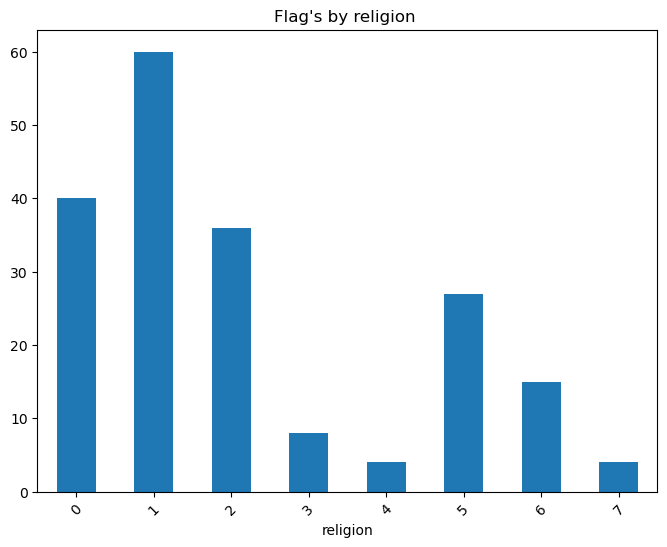

In [35]:
data.groupby('religion')['name'].count().plot(kind='bar', rot=45, fontsize=10, figsize=(8, 6))
plt.title("Flag's by religion ")

Text(0.5, 1.0, 'Population by religion ')

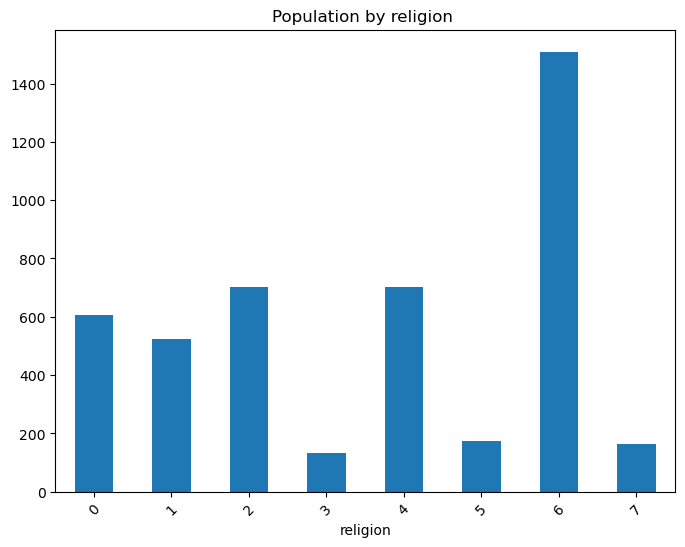

In [43]:
data.groupby('religion')['population'].sum().plot(kind='bar', rot=45, fontsize=10, figsize=(8, 6) )
plt.title("Population by religion ")

In [79]:
X = pd.concat([data[continious], data[dummies], pd.get_dummies(data[categoricals])], axis=1)
y = data[target]

In [80]:
X.head()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,648,16,0,3,5,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,29,3,0,0,3,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,2388,20,2,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Разделим выборку, чтобы в Train попали все религии

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=.2)
for trn_idx,tst_idx in sss.split(X,y):
    X_train,y_train = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test,y_test = X.iloc[tst_idx],y.iloc[tst_idx]
    
assert len(X_train)+len(X_test) == len(y_train)+len(y_test) == len(X) == len(y)

### Базовая модель

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report

In [88]:
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=100, n_jobs=-1, random_state=42)

In [89]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [90]:
y_pred = rfc.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.62      0.67      0.64        12
           2       0.38      0.71      0.50         7
           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         1
           5       0.67      0.40      0.50         5
           6       1.00      0.00      0.00         3
           7       1.00      0.00      0.00         1

    accuracy                           0.54        39
   macro avg       0.78      0.32      0.29        39
weighted avg       0.65      0.54      0.49        39



<AxesSubplot:>

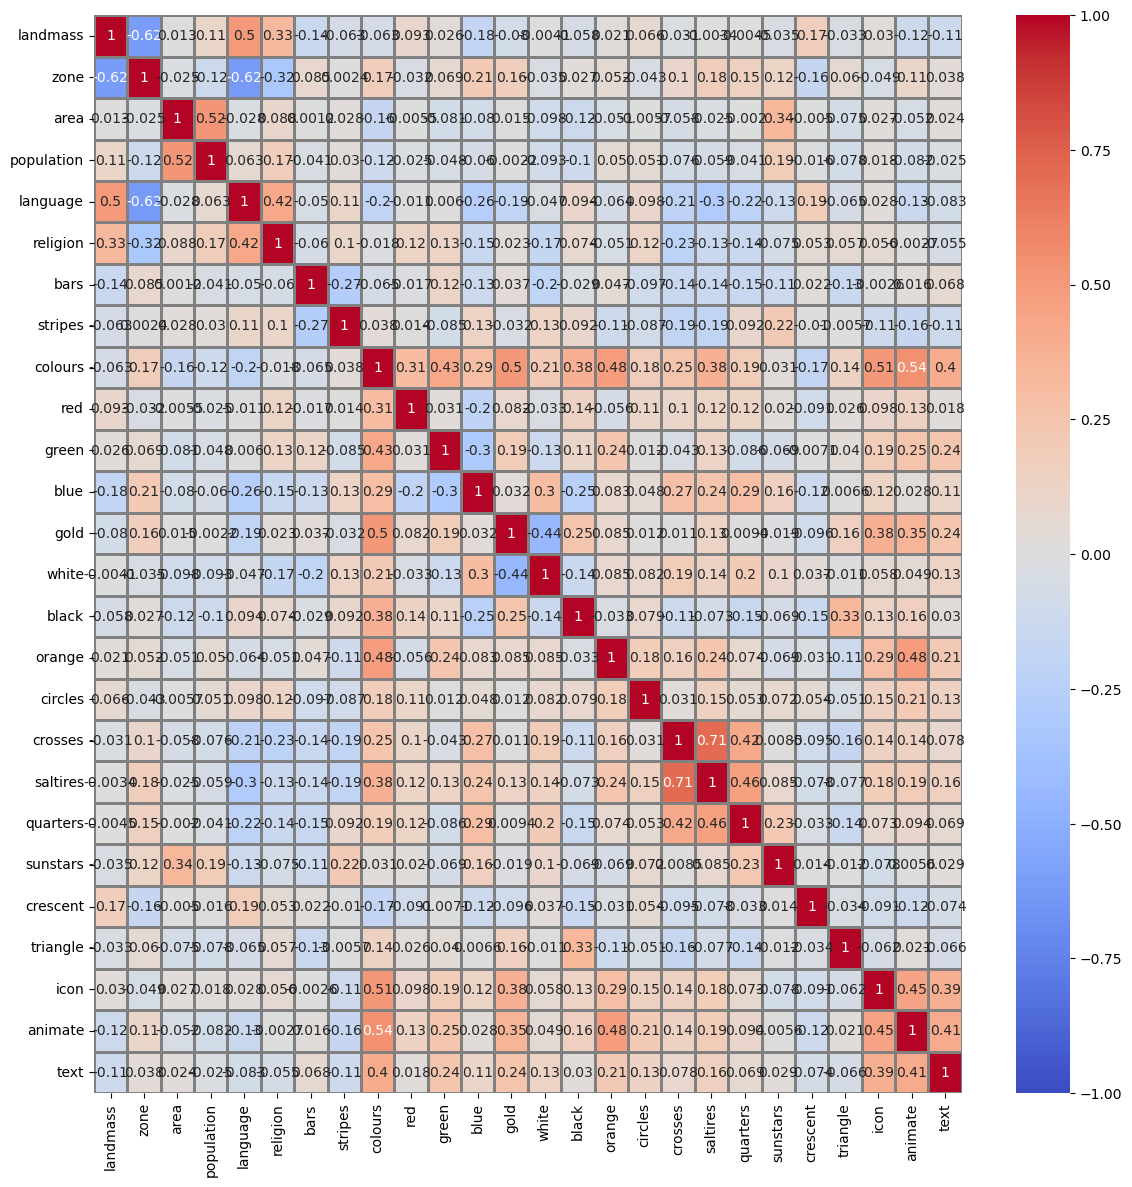

In [94]:
corr_matrix = data.drop(columns=['name','topleft','botright','mainhue']).corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=1,linecolor='grey', ax=ax)

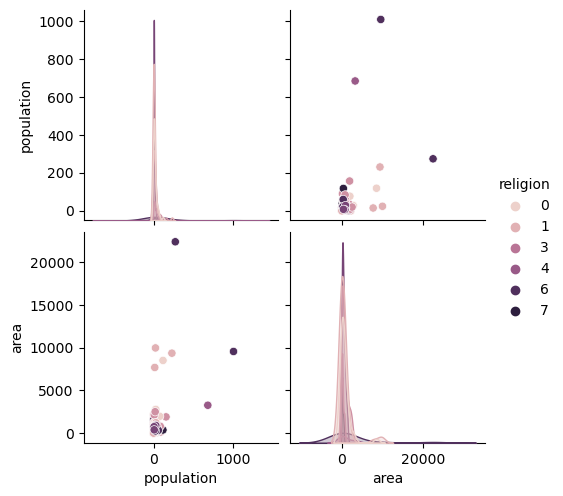

In [96]:
_ = sns.pairplot(data = data, vars=['population','area'], hue='religion')

Проверим на выбросы непрерывные переменные

In [98]:
def get_boxplot(X, columns=[]):
    plt.grid(0.1)
    for i in columns:
        sns.boxplot(x=X[i])
    pass

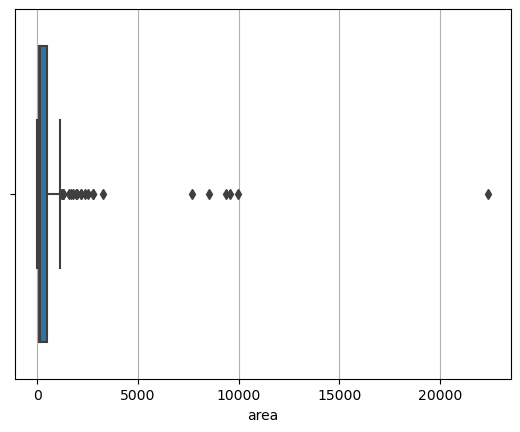

In [104]:
get_boxplot(X,['area'])

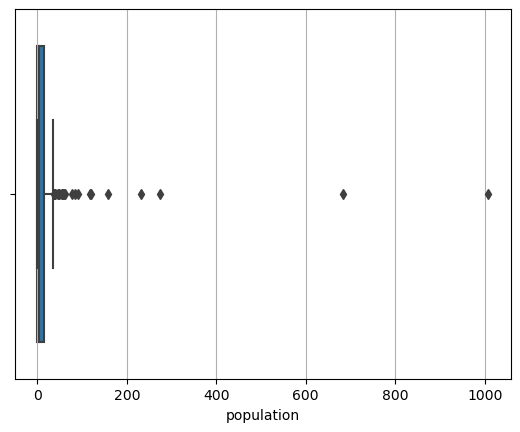

In [105]:
get_boxplot(X,['population'])

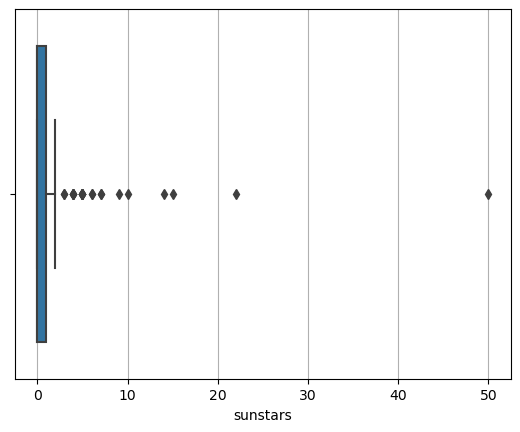

In [113]:
get_boxplot(X,['sunstars'])

Нормализуем переменные признаки с помощью normalize()

In [114]:
from sklearn import preprocessing 
d = preprocessing.normalize(X[continious], axis=0) 
X_scaled= pd.DataFrame(d, ) 
X_scaled.head() 


,0,1,2,3,4,5,6,7,8,9
0,0.020444,0.012143,0.0000,0.077126,0.097055,0.0,0.0,0.0,0.0,0.015612
1,0.000915,0.002277,0.0000,0.000000,0.058233,0.0,0.0,0.0,0.0,0.015612
2,0.075340,0.015178,0.1270,0.000000,0.058233,0.0,0.0,0.0,0.0,0.015612
3,0.000000,0.000000,0.0000,0.000000,0.097055,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.1905,0.000000,0.058233,0.0,0.0,0.0,0.0,0.000000


In [120]:
X_norm = pd.concat([X_scaled, data[dummies],pd.get_dummies(data[categoricals])],axis=1)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0.020444,0.012143,0.0000,0.077126,0.097055,0.0,0.0,0.0,0.0,0.015612,...,0,0,0,0,0,0,1,0,0,0
1,0.000915,0.002277,0.0000,0.000000,0.058233,0.0,0.0,0.0,0.0,0.015612,...,1,0,0,0,0,0,0,0,1,0
2,0.075340,0.015178,0.1270,0.000000,0.058233,0.0,0.0,0.0,0.0,0.015612,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.000000,0.0000,0.000000,0.097055,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.000000,0.1905,0.000000,0.058233,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [121]:
for trn_idx,tst_idx in sss.split(X_norm,y):
    X_train,y_train = X_norm.iloc[trn_idx],y.iloc[trn_idx]
    X_test,y_test = X_norm.iloc[tst_idx],y.iloc[tst_idx]
    
assert len(X_train)+len(X_test) == len(y_train)+len(y_test) == len(X) == len(y)

In [123]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.80      1.00      0.89        12
           2       0.43      0.86      0.57         7
           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         1
           5       1.00      0.60      0.75         5
           6       1.00      0.33      0.50         3
           7       1.00      0.00      0.00         1

    accuracy                           0.69        39
   macro avg       0.88      0.43      0.43        39
weighted avg       0.80      0.69      0.66        39



Нормализация признаков дает лучший результат, чем базовая модель